In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import tensorflow as tf

/Users/qin/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# path of the current directory
cur_dir = os.getcwd()
print("Current directory is {}\n".format(cur_dir))
data_with_features_path = cur_dir+"/DSWithStanfordSentimentalFeatures"
data_without_features_path = cur_dir+"/drugsCom"
print("Files with features: {}\n".format(os.listdir(data_with_features_path)))
print("Files without features: {}\n".format(os.listdir(data_without_features_path)))

Current directory is /Users/qin/Desktop/DrugCom/CS6250_Project

Files with features: ['drugsTestDataRecallOnlyWithFeatures', 'drugsTrainingDataWithFeatures', 'drugsTrainingDataNonRecallOnlyWithFeatures', 'drugsTrainingDataRecallOnlyWithFeatures', 'drugsTestingDataWithFeatures', 'drugsTestDataNonRecallOnlyWithFeatures']

Files without features: ['.DS_Store', 'wordVectormodel.tar.gz', 'whole.csv', 'train_dataset.csv', 'test.csv', 'readme.md', 'whole_num.csv', 'test_dataset.csv', 'train.csv']



In [3]:
whole_without_features_path = data_without_features_path + "/whole.csv"
train_with_features_path = data_with_features_path + "/drugsTrainingDataWithFeatures"
test_with_features_path = data_with_features_path + "/drugsTestingDataWithFeatures"

In [4]:
train_with_features = pd.read_csv(train_with_features_path, sep='\t')
test_with_features = pd.read_csv(test_with_features_path, sep='\t')

In [5]:
train_with_features = train_with_features.drop(columns=train_with_features.columns[0]).rename(columns={train_with_features.columns[1]:'id'})
train_with_features.head()

,id,drugName,condition,review,rating,date,usefulCount,Sentimental_Polarity,Sentimental_Subjectivity,recall_status,vader_neg,vader_neu,vader_pos,vader_comp,stanford_neg,stanford_neu,stanford_pos
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,0.000000,0.000000,True,0.000,1.000,0.000,0.0000,0.0,1.0,0.0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,0.188021,0.482812,False,0.035,0.750,0.215,0.9169,1.0,0.0,0.0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0.138485,0.327475,False,0.039,0.828,0.133,0.8176,0.0,1.0,0.0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,0.357143,0.607143,False,0.118,0.714,0.168,0.5267,1.0,0.0,0.0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,0.172333,0.389667,False,0.113,0.602,0.285,0.9260,1.0,0.0,0.0


In [6]:
test_with_features = test_with_features.drop(columns=test_with_features.columns[0]).rename(columns={test_with_features.columns[1]:'id'})
test_with_features.head()

,id,drugName,condition,review,rating,date,usefulCount,Sentimental_Polarity,Sentimental_Subjectivity,recall_status,vader_neg,vader_neu,vader_pos,vader_comp,stanford_neg,stanford_neu,stanford_pos
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,-0.300000,0.550000,True,0.199,0.518,0.283,0.6911,1.0,0.0,0.0
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,0.333333,0.566667,False,0.073,0.733,0.193,0.5574,1.0,0.0,0.0
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,0.333333,0.500000,False,0.000,1.000,0.000,0.0000,0.0,1.0,0.0
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,0.253125,0.575000,False,0.133,0.748,0.119,-0.2747,1.0,0.0,0.0
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,0.204792,0.526458,False,0.029,0.759,0.212,0.9357,1.0,0.0,0.0


In [7]:
print(test_with_features.shape, train_with_features.shape)

(53766, 17) (161297, 17)


In [8]:
whole_without_features = pd.read_csv(whole_without_features_path)
whole_without_features.head()

,id,drugName,condition,review,rating,date,usefulCount,partial_name,is_recalled,review_length,review_word_count,cleaned_words,review_cleaned_word_count,review_avg_word_length,review_avg_cleaned_word_length
0,206461,Valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,valsartan,True,79,17,"['side', 'effect', 'take', 'combination', 'bys...",8,3.705882,5.250000
1,95260,Guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,guanfacine,False,741,141,"['son', 'halfway', 'fourth', 'week', 'intuniv'...",65,4.262411,5.630769
2,92703,Lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,lybrel,False,755,133,"['used', 'take', 'another', 'oral', 'contracep...",69,4.684211,5.637681
3,138000,Ortho Evra,birth control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,ortho evra,False,448,89,"['first', 'time', 'using', 'form', 'birth', 'c...",39,4.044944,5.282051
4,35696,Buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,buprenorphine,False,719,134,"['suboxone', 'completely', 'turned', 'life', '...",59,4.373134,6.355932


In [9]:
train = train_with_features[train_with_features.columns[[0, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]].merge(whole_without_features, how = 'left', on = 'id')
train.head()

,id,Sentimental_Polarity,Sentimental_Subjectivity,recall_status,vader_neg,vader_neu,vader_pos,vader_comp,stanford_neg,stanford_neu,...,date,usefulCount,partial_name,is_recalled,review_length,review_word_count,cleaned_words,review_cleaned_word_count,review_avg_word_length,review_avg_cleaned_word_length
0,206461,0.000000,0.000000,True,0.000,1.000,0.000,0.0000,0.0,1.0,...,2012-05-20,27,valsartan,True,79,17,"['side', 'effect', 'take', 'combination', 'bys...",8,3.705882,5.250000
1,95260,0.188021,0.482812,False,0.035,0.750,0.215,0.9169,1.0,0.0,...,2010-04-27,192,guanfacine,False,741,141,"['son', 'halfway', 'fourth', 'week', 'intuniv'...",65,4.262411,5.630769
2,92703,0.138485,0.327475,False,0.039,0.828,0.133,0.8176,0.0,1.0,...,2009-12-14,17,lybrel,False,755,133,"['used', 'take', 'another', 'oral', 'contracep...",69,4.684211,5.637681
3,138000,0.357143,0.607143,False,0.118,0.714,0.168,0.5267,1.0,0.0,...,2015-11-03,10,ortho evra,False,448,89,"['first', 'time', 'using', 'form', 'birth', 'c...",39,4.044944,5.282051
4,35696,0.172333,0.389667,False,0.113,0.602,0.285,0.9260,1.0,0.0,...,2016-11-27,37,buprenorphine,False,719,134,"['suboxone', 'completely', 'turned', 'life', '...",59,4.373134,6.355932


In [10]:
test = test_with_features[test_with_features.columns[[0, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]].merge(whole_without_features, how = 'left', on = 'id')
test.head()

,id,Sentimental_Polarity,Sentimental_Subjectivity,recall_status,vader_neg,vader_neu,vader_pos,vader_comp,stanford_neg,stanford_neu,...,date,usefulCount,partial_name,is_recalled,review_length,review_word_count,cleaned_words,review_cleaned_word_count,review_avg_word_length,review_avg_cleaned_word_length
0,163740,-0.300000,0.550000,True,0.199,0.518,0.283,0.6911,1.0,0.0,...,2012-02-28,22,mirtazapine,False,439,68,"['tried', 'antidepressants', 'years', 'citalop...",36,5.470588,7.083333
1,206473,0.333333,0.566667,False,0.073,0.733,0.193,0.5574,1.0,0.0,...,2009-05-17,17,mesalamine,False,268,51,"['son', 'crohn', 'disease', 'done', 'well', 'a...",24,4.274510,5.500000
2,159672,0.333333,0.500000,False,0.000,1.000,0.000,0.0000,0.0,1.0,...,2017-09-29,3,bactrim,False,29,4,"['quick', 'reduction', 'symptoms']",3,6.500000,7.333333
3,39293,0.253125,0.575000,False,0.133,0.748,0.119,-0.2747,1.0,0.0,...,2017-03-05,35,contrave,False,782,143,"['contrave', 'combines', 'drugs', 'used', 'alc...",64,4.475524,5.625000
4,97768,0.204792,0.526458,False,0.029,0.759,0.212,0.9357,1.0,0.0,...,2015-10-22,4,cyclafem 1,False,762,149,"['birth', 'control', 'one', 'cycle', 'reading'...",63,4.120805,5.603175


In [11]:
#print(pd.isnull(whole_without_features).sum())
whole_without_features['condition'] = whole_without_features['condition'].fillna('')
# No missing values
assert(whole_without_features.isnull().values.any() == False)

In [12]:
#print(pd.isnull(train).sum())
train['condition'] = train['condition'].fillna('')
# No missing values
assert(train.isnull().values.any() == False)
#print(pd.isnull(test).sum())
test['condition'] = test['condition'].fillna('')
# No missing values
assert(test.isnull().values.any() == False)

In [13]:
# If want to keep the split of train/test
# use the code below:
#X_train = train.drop(columns = ['is_recalled', 'recall_status', 'drugName', 'condition', 'review', 'rating', 'date', 'partial_name', 'cleaned_words']).values
#y_train = train['is_recalled'].values.reshape([-1, 1])
#X_test = test.drop(columns = ['is_recalled', 'recall_status', 'drugName', 'condition', 'review', 'rating', 'date', 'partial_name', 'cleaned_words']).values
#y_test = test['is_recalled'].values.reshape([-1, 1])

In [14]:
train = train.drop(columns = ['recall_status', 'drugName', 'condition', 'review', 'rating', 'date', 'partial_name', 'cleaned_words'])
test = test.drop(columns = ['recall_status', 'drugName', 'condition', 'review', 'rating', 'date', 'partial_name', 'cleaned_words'])
whole = pd.concat([train, test])

In [15]:
X = whole.drop(columns = ['is_recalled']).values
y = whole['is_recalled'].values.reshape([-1, 1])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [16]:
def get_train_test(whole, downsample = False, n_is_called = 1, seed = 1234):
    X = whole.drop(columns = ['is_recalled']).values
    y = whole['is_recalled'].values.reshape([-1, 1])
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    y_test = y_test.reshape((-1,1))

    if downsample == False:
        y_train = y_train.reshape((-1,1))
        return X_train, y_train, X_test, y_test
    else:
        not_recalled_idx = [x for x in range(y_train.shape[0]) if y_train[x]==0]
        is_recalled_idx = [x for x in range(y_train.shape[0]) if y_train[x]==1]
        assert len(not_recalled_idx) + sum(y_train)[0] == y_train.shape[0]
        chose = np.random.choice(not_recalled_idx, int(n_is_called * sum(y_train)[0]), replace=False)
        X_train_downsample = np.vstack((X_train[chose, :],X_train[is_recalled_idx, :]))
        y_train_downsample = np.vstack((y_train[chose, :], y_train[y_train==1].reshape((-1, 1))))
        y_train_downsample = y_train_downsample.reshape((-1, 1))
        return X_train_downsample, y_train_downsample, X_test, y_test


In [17]:
from sklearn.metrics import confusion_matrix
import itertools 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [18]:
n_recalled = y_train.sum() + y_test.sum()
n_not_recalled = len(y_train) + len(y_test) - n_recalled
n_not_recalled / (len(y_train) + len(y_test))

0.8944820819945783

In [19]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [20]:
# inputs
training_epochs = 2000
learning_rate = 0.01

cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,16])
Y = tf.placeholder(tf.float32,[None,1])
is_training=tf.Variable(True,dtype=tf.bool)

num_inputs = 16    # 16 independent variables
num_hid1 = 128
num_hid2 = 64
num_hid3 = 32
num_output = 1 # is_recalled/not_recalled

In [21]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1)
y_train_ = y_train.reshape((y_train.shape[0],1))
y_test_ = y_test.reshape((y_test.shape[0],1))

In [22]:
# models

initializer = tf.contrib.layers.xavier_initializer()
h1 = tf.layers.dense(X, num_hid1, activation=tf.nn.elu, kernel_initializer=initializer, name = 'h1')
h2 = tf.layers.dense(h1, num_hid2, activation=tf.nn.elu, kernel_initializer=initializer, name = 'h2')
h3 = tf.layers.dense(h2, num_hid3, activation=tf.nn.elu, kernel_initializer=initializer, name = 'h3')
output = tf.layers.dense(h3, num_output, activation=None, name = 'output')

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=output)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


predicted = tf.round(tf.nn.sigmoid(output))
correct_pred = tf.equal(predicted, Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Step:     0	Loss: 0.790	Acc: 53.75%
Step:   100	Loss: 0.579	Acc: 69.72%
Step:   200	Loss: 0.539	Acc: 72.79%
Step:   300	Loss: 0.493	Acc: 76.21%
Step:   400	Loss: 0.478	Acc: 76.54%
Step:   500	Loss: 0.486	Acc: 75.83%
Step:   600	Loss: 0.435	Acc: 79.10%
Step:   700	Loss: 0.404	Acc: 81.13%
Step:   800	Loss: 0.375	Acc: 82.94%
Step:   900	Loss: 0.350	Acc: 84.52%
Step:  1000	Loss: 0.337	Acc: 85.24%
Step:  1100	Loss: 0.325	Acc: 85.87%
Step:  1200	Loss: 0.314	Acc: 86.35%
Step:  1300	Loss: 0.306	Acc: 86.78%
Step:  1400	Loss: 0.307	Acc: 86.73%
Step:  1500	Loss: 0.288	Acc: 87.80%
Step:  1600	Loss: 0.274	Acc: 88.68%
Step:  1700	Loss: 0.269	Acc: 88.91%
Step:  1800	Loss: 0.263	Acc: 89.09%
Step:  1900	Loss: 0.291	Acc: 87.05%
Step:  2000	Loss: 0.253	Acc: 89.57%
Step:  2100	Loss: 0.243	Acc: 90.17%
Step:  2200	Loss: 0.237	Acc: 90.55%
Step:  2300	Loss: 0.589	Acc: 78.37%
Step:  2400	Loss: 0.248	Acc: 89.66%
Step:  2500	Loss: 0.226	Acc: 91.12%
Step:  2600	Loss: 0.218	Acc: 91.54%
Step:  2700	Loss: 0.215	Acc:

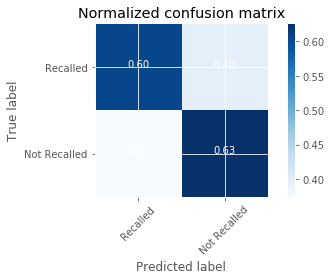

In [23]:
# session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(training_epochs + 1):
        sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
        loss, _, acc = sess.run([cost, optimizer, accuracy], feed_dict={
                                 X: X_train, Y: y_train})
        cost_history = np.append(cost_history, acc)
        if step % 100 == 0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
            
    # Test model and check accuracy
    acc_pred = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    pred = sess.run(predicted, feed_dict={X: X_test, Y: y_test})
    print('Test Accuracy:', acc_pred)
    cnf_matrix = confusion_matrix(y_test, pred)
    np.set_printoptions(precision=2)
    class_names = ['Recalled', 'Not Recalled']
    plt.figure()
    plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')
    

Step:     0	Loss: 0.726	Acc: 61.40%
Step:   100	Loss: 0.436	Acc: 81.22%
Step:   200	Loss: 0.426	Acc: 81.57%
Step:   300	Loss: 0.415	Acc: 81.91%
Step:   400	Loss: 0.404	Acc: 82.21%
Step:   500	Loss: 0.393	Acc: 82.70%
Step:   600	Loss: 0.388	Acc: 82.91%
Step:   700	Loss: 0.377	Acc: 83.46%
Step:   800	Loss: 0.405	Acc: 82.07%
Step:   900	Loss: 0.357	Acc: 84.36%
Step:  1000	Loss: 0.350	Acc: 84.67%
Step:  1100	Loss: 0.363	Acc: 83.88%
Step:  1200	Loss: 0.342	Acc: 85.10%
Step:  1300	Loss: 0.342	Acc: 85.03%
Step:  1400	Loss: 0.337	Acc: 85.28%
Step:  1500	Loss: 0.328	Acc: 85.85%
Step:  1600	Loss: 0.319	Acc: 86.19%
Step:  1700	Loss: 0.323	Acc: 85.94%
Step:  1800	Loss: 0.318	Acc: 86.19%
Step:  1900	Loss: 0.317	Acc: 86.06%
Step:  2000	Loss: 0.313	Acc: 86.48%
Step:  2100	Loss: 0.307	Acc: 86.73%
Step:  2200	Loss: 0.306	Acc: 86.82%
Step:  2300	Loss: 0.308	Acc: 86.71%
Step:  2400	Loss: 0.308	Acc: 86.53%
Step:  2500	Loss: 0.293	Acc: 87.48%
Step:  2600	Loss: 0.294	Acc: 87.23%
Step:  2700	Loss: 0.294	Acc:

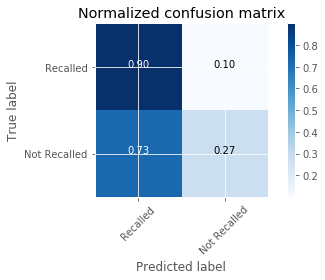

In [24]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 4)
# session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(training_epochs + 1):
        sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
        loss, _, acc = sess.run([cost, optimizer, accuracy], feed_dict={
                                 X: X_train, Y: y_train})
        cost_history = np.append(cost_history, acc)
        if step % 100 == 0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
            
    # Test model and check accuracy
    acc_pred = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    pred = sess.run(predicted, feed_dict={X: X_test, Y: y_test})
    print('Test Accuracy:', acc_pred)
    cnf_matrix = confusion_matrix(y_test, pred)
    np.set_printoptions(precision=2)
    class_names = ['Recalled', 'Not Recalled']
    plt.figure()
    plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')
    

81.692214696446
Normalized confusion matrix
[[0.83 0.17]
 [0.28 0.72]]


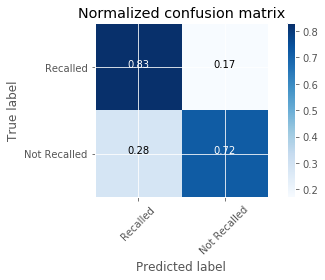

In [25]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1)
dt_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
print(accuracy_score(y_test,y_pred_gini)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

81.89835552317922
Normalized confusion matrix
[[0.83 0.17]
 [0.3  0.7 ]]


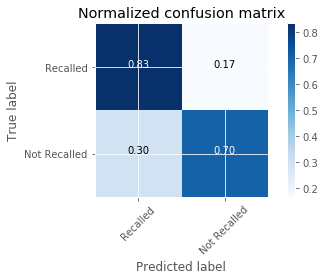

In [26]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1.5)
dt_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
print(accuracy_score(y_test,y_pred_gini)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

84.78122723538803
Normalized confusion matrix
[[0.87 0.13]
 [0.38 0.62]]


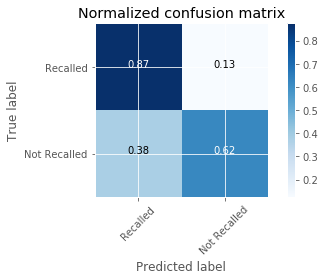

In [27]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1.8)
dt_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
print(accuracy_score(y_test,y_pred_gini)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

91.51412762132085
Normalized confusion matrix
[[1.   0.  ]
 [0.79 0.21]]


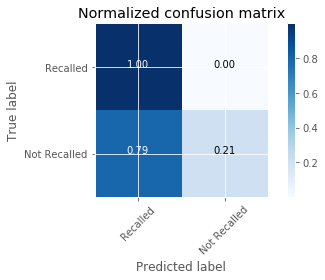

In [28]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = False)
dt_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
print(accuracy_score(y_test,y_pred_gini)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

81.1683380089586
Normalized confusion matrix
[[0.85 0.15]
 [0.5  0.5 ]]


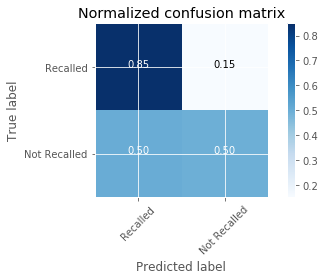

In [29]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1.5)
dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_entropy)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

80.08338628931013
Normalized confusion matrix
[[0.83 0.17]
 [0.48 0.52]]


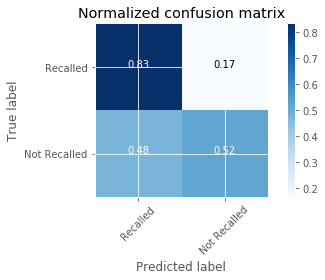

In [30]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1.8)
dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_entropy)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

80.08648615136626
Normalized confusion matrix
[[0.83 0.17]
 [0.48 0.52]]


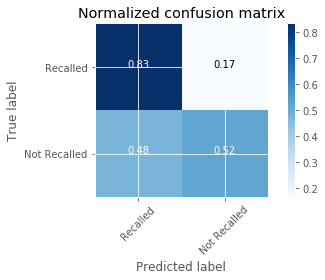

In [31]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 2)
dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_entropy)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

89.8231528696973
Normalized confusion matrix
[[1.00e+00 2.25e-04]
 [9.61e-01 3.89e-02]]


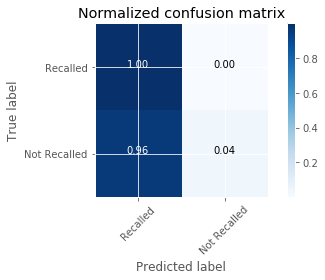

In [32]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 6)
dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy)*100)
cnf_matrix = confusion_matrix(y_test, y_pred_entropy)
np.set_printoptions(precision=2)
class_names = ['Recalled', 'Not Recalled']
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

Step:     0	Loss: 0.459	Acc: 85.53%
Step:   100	Loss: 0.334	Acc: 87.75%
Step:   200	Loss: 0.328	Acc: 87.94%
Step:   300	Loss: 0.319	Acc: 88.07%
Step:   400	Loss: 0.309	Acc: 88.17%
Step:   500	Loss: 0.301	Acc: 88.55%
Step:   600	Loss: 0.290	Acc: 88.99%
Step:   700	Loss: 0.294	Acc: 89.05%
Step:   800	Loss: 0.269	Acc: 90.05%
Step:   900	Loss: 0.265	Acc: 90.11%
Step:  1000	Loss: 0.254	Acc: 90.53%
Step:  1100	Loss: 0.251	Acc: 90.66%
Step:  1200	Loss: 0.243	Acc: 91.13%
Step:  1300	Loss: 0.241	Acc: 91.22%
Step:  1400	Loss: 0.236	Acc: 91.40%
Step:  1500	Loss: 0.230	Acc: 91.64%
Step:  1600	Loss: 0.234	Acc: 91.48%
Step:  1700	Loss: 0.220	Acc: 92.08%
Step:  1800	Loss: 0.233	Acc: 91.67%
Step:  1900	Loss: 0.215	Acc: 92.29%
Step:  2000	Loss: 0.213	Acc: 92.32%
Test Accuracy: 0.90427625
Normalized confusion matrix
[[0.97 0.03]
 [0.64 0.36]]


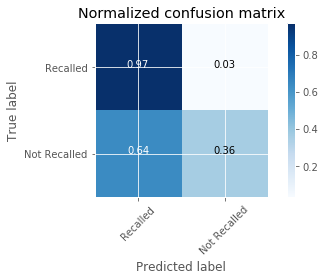

In [23]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 7)
# session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(training_epochs + 1):
        sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
        loss, _, acc = sess.run([cost, optimizer, accuracy], feed_dict={
                                 X: X_train, Y: y_train})
        cost_history = np.append(cost_history, acc)
        if step % 100 == 0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
            
    # Test model and check accuracy
    acc_pred = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    pred = sess.run(predicted, feed_dict={X: X_test, Y: y_test})
    print('Test Accuracy:', acc_pred)
    cnf_matrix = confusion_matrix(y_test, pred)
    np.set_printoptions(precision=2)
    class_names = ['Recalled', 'Not Recalled']
    plt.figure()
    plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')
    

Step:     0	Loss: 0.490	Acc: 79.66%
Step:   100	Loss: 0.309	Acc: 89.14%
Step:   200	Loss: 0.304	Acc: 89.18%
Step:   300	Loss: 0.296	Acc: 89.25%
Step:   400	Loss: 0.293	Acc: 89.33%
Step:   500	Loss: 0.276	Acc: 89.89%
Step:   600	Loss: 0.265	Acc: 90.21%
Step:   700	Loss: 0.253	Acc: 90.73%
Step:   800	Loss: 0.248	Acc: 90.84%
Step:   900	Loss: 0.242	Acc: 91.25%
Step:  1000	Loss: 0.243	Acc: 90.97%
Step:  1100	Loss: 0.239	Acc: 91.19%
Step:  1200	Loss: 0.242	Acc: 90.85%
Step:  1300	Loss: 0.234	Acc: 91.31%
Step:  1400	Loss: 0.226	Acc: 91.69%
Step:  1500	Loss: 0.227	Acc: 91.51%
Step:  1600	Loss: 0.217	Acc: 91.99%
Step:  1700	Loss: 0.217	Acc: 92.10%
Step:  1800	Loss: 0.213	Acc: 92.16%
Step:  1900	Loss: 0.226	Acc: 91.42%
Step:  2000	Loss: 0.207	Acc: 92.45%
Test Accuracy: 0.898123
Normalized confusion matrix
[[0.97 0.03]
 [0.69 0.31]]


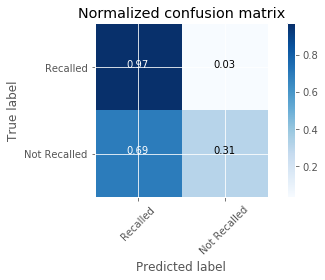

In [24]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 8)
# session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(training_epochs + 1):
        sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
        loss, _, acc = sess.run([cost, optimizer, accuracy], feed_dict={
                                 X: X_train, Y: y_train})
        cost_history = np.append(cost_history, acc)
        if step % 100 == 0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
            
    # Test model and check accuracy
    acc_pred = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    pred = sess.run(predicted, feed_dict={X: X_test, Y: y_test})
    print('Test Accuracy:', acc_pred)
    cnf_matrix = confusion_matrix(y_test, pred)
    np.set_printoptions(precision=2)
    class_names = ['Recalled', 'Not Recalled']
    plt.figure()
    plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')
    